# Lane Marking Segmentation #

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
url = 'results.xlsx'
df = pd.read_excel(url)
df.head(55)

,first_try,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,NaN,NaN,CLASSES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,METRIC,MEAN,1,2.000000,3.0,4.0,5.000000,6.0,7.0,8.000000,...,29.0,30.0,31.0,32.000000,33.0,34.0,35.000000,36.0,37.0,38.0
2,Accuracy,0.981247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Class Accuracy,0.1951,0.995344,0.600925,NaN,NaN,0.295808,NaN,NaN,0.325049,...,NaN,NaN,NaN,0.000000,0.0,NaN,0.101298,0.0,NaN,NaN
4,mIoU,0.165242,0.985098,0.502620,NaN,NaN,0.198093,NaN,NaN,0.286485,...,NaN,NaN,NaN,0.000000,0.0,NaN,0.099777,0.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,frequency_weights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,CLASSES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,METRIC,MEAN,1,2.000000,3.0,4.0,5.000000,6.0,7.0,8.000000,...,29.0,30.0,31.0,32.000000,33.0,34.0,35.000000,36.0,37.0,38.0
9,Accuracy,0.962502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
count,12.000000,3.0,3.0,9.000000,5.000000,3.0,9.000000,3.0,3.0,3.0,...,3.0,3.0,3.0,9.000000,9.0,3.0,9.000000,9.0,3.0,3.0
mean,1.079304,3.0,4.0,1.896187,3.600000,7.0,3.002889,9.0,10.0,11.0,...,29.0,30.0,31.0,10.669015,11.0,34.0,11.760596,12.0,37.0,38.0
std,0.701023,0.0,0.0,2.332426,3.286335,0.0,3.752576,0.0,0.0,0.0,...,0.0,0.0,0.0,15.998239,16.5,0.0,17.429735,18.0,0.0,0.0
min,0.287563,3.0,4.0,0.198093,0.000000,7.0,0.286485,9.0,10.0,11.0,...,29.0,30.0,31.0,0.000000,0.0,34.0,0.051954,0.0,37.0,38.0
25%,0.510147,3.0,4.0,0.209033,0.000000,7.0,0.349562,9.0,10.0,11.0,...,29.0,30.0,31.0,0.000000,0.0,34.0,0.101298,0.0,37.0,38.0
50%,0.813838,3.0,4.0,0.552796,6.000000,7.0,0.793019,9.0,10.0,11.0,...,29.0,30.0,31.0,0.007914,0.0,34.0,0.149458,0.0,37.0,38.0
75%,2.000000,3.0,4.0,5.000000,6.000000,7.0,8.000000,9.0,10.0,11.0,...,29.0,30.0,31.0,32.000000,33.0,34.0,35.000000,36.0,37.0,38.0
max,2.000000,3.0,4.0,5.000000,6.000000,7.0,8.000000,9.0,10.0,11.0,...,29.0,30.0,31.0,32.000000,33.0,34.0,35.000000,36.0,37.0,38.0


# Plot All Representative Attributes

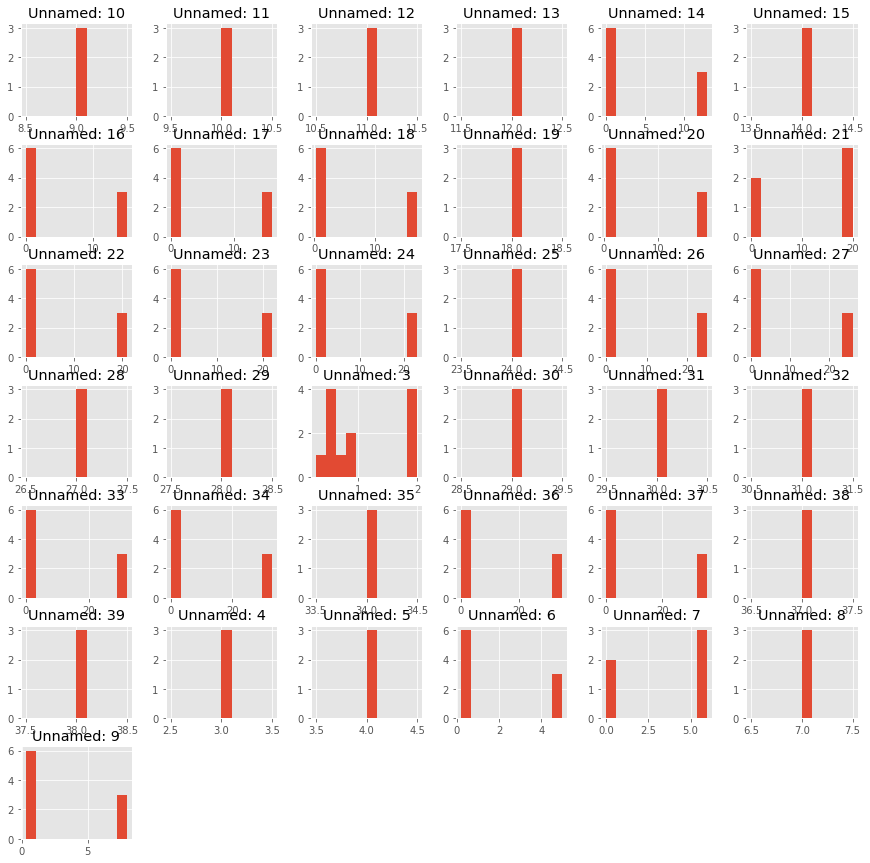

In [6]:
pd.DataFrame.hist(df, figsize = [15,15]);

# Show a bar graph with the value counts of the attribute mIoU. Use the method value_counts of Pandas, then plot with the option kind = 'bar'

In [7]:
df['CLASSES'].value_counts().plot(kind = 'bar')

KeyError: 'CLASSES'

Text(0, 0.5, 'Mean of Accuracy and mIoU')

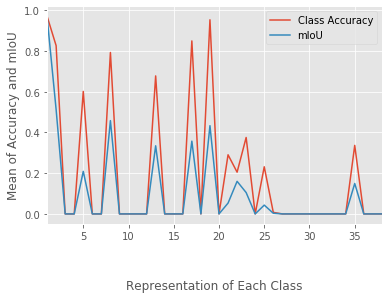

In [7]:

df1 = pd.DataFrame({'Class Accuracy' :[0.97110005, 0.82672061, 0, 0, 0.60171777, 0, 0, 0.79301861, 0, 0, 0, 0,
                                      0.67792481, 0, 0, 0, 0.84988017, 0, 0.95367905, 0, 0.29044513, 0.20509659,
                                      0.3754657, 0, 0.23152952, 0.00762159, 0, 0, 0 ,0 ,0 ,0 , 0, 0, 0.33666951,
                                      0, 0, 0],
                   'mIoU' :[0.96808585, 0.51265661, 0, 0, 0.20903274, 0, 0, 0.45837568, 0, 0, 0, 0, 
                            0.33465481, 0, 0, 0, 0.35744395, 0, 0.43347121, 0, 0.05311876,
                           0.16005003, 0.10490618, 0, 0.04325818, 0.00335389, 0, 0, 0 ,0, 0,
                           0, 0, 0, 0.1494584, 0, 0, 0]},
                  index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                          21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]) 
lines = df1.plot.line()
plt.xlabel("Representation of Each Class", labelpad=38)
plt.ylabel("Mean of Accuracy and mIoU")

Text(0, 0.5, 'Mean of Accuracy and mIoU')

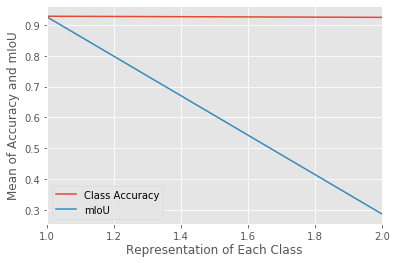

In [6]:

df1 = pd.DataFrame({'Class Accuracy' :[0.92796564, 0.9243299,],
                   'mIoU' :[0.92568697, 0.28756341 ]},
                  index = [1, 2])
lines = df1.plot.line()
plt.xlabel("Representation of Each Class", labelpad=2)
plt.ylabel("Mean of Accuracy and mIoU")

/home/fikrat/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


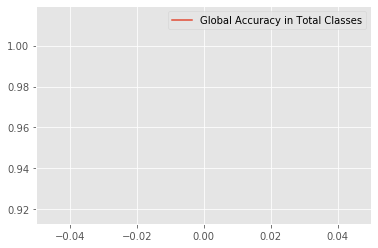

In [7]:
df2 = pd.DataFrame({'Global Accuracy in Total Classes' :[0.9660562806554688]})
lines1 = df2.plot.line()

In [9]:
Global_Accuracy = (0.9660562806554688)
Classes = ['Total']


In [10]:
gb = pd.DataFrame(
    {'Global_Accuracy': Global_Accuracy, 'Classes': Classes})
gb.set_index('Global_Accuracy')['Classes'].plot();

TypeError: no numeric data to plot

In [11]:
sorted_rules=df.sort_values(by=['Class Accuracy','mIoU'],ascending=False).reset_index(drop=True)
sorted_rules.loc[:,['Class Accuracy','mIoU']].plot(title='Metrics')

KeyError: 'Class Accuracy'

In [ ]:
df['mIoU'].describe()

In [12]:
df['Class Accuracy'].describe()

KeyError: 'Class Accuracy'

In [13]:
df.plot.scatter(x='Class Accuracy',
                   y='mIoU', 
                   title='Association Rules (dot proportional to Lift)', 
                   s=0.5)

KeyError: 'Class Accuracy'